Cosmology (compact) SS2020 

# Exercise sheet 3

## 1. Evolution of density contrast on different spatial scales

In [1]:
#%matplotlib widget
import sys
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pandas as pd
import matplotlib.colors as clr

In [2]:
# Read file, find the data, read the header
fname = "simulation"
f = h5py.File("/u/yali/cosmology/"+fname+".hdf5", 'r')
print(f["Snapshots"]["99"]["PartType1"].keys())

header = dict(f["Header"].attrs.items())
h = header["HubbleParam"]
mass_dm = header["MassTable"][1] * 1e10 / h
lbox = header["BoxSize"]/h

snapshot = 99
header_snapshot = dict(f["Snapshots/{}/Header".format(snapshot)].attrs.items())
z_snapshot = round(header_snapshot["Redshift"], 1)
a = header_snapshot["Time"]

<KeysViewHDF5 ['Coordinates', 'ParticleIDs', 'Potential', 'SubfindDMDensity', 'SubfindDensity', 'SubfindHsml', 'SubfindVelDisp', 'Velocities']>


In [3]:
snapshots = [2, 17, 33, 99]
dmdf2 = pd.DataFrame()
dmdf2["DMPosX"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[0])][:,0] * a/h
dmdf2["DMPosY"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[0])][:,1] * a/h
dmdf2["DMPosZ"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[0])][:,2] * a/h
dmdf2["Dens"] = f["Snapshots/{}/PartType1/SubfindDMDensity".format(snapshots[0])][:] *1e10/h/(a/h)**3
dmdf17 = pd.DataFrame()
dmdf17["DMPosX"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[1])][:,0] * a/h
dmdf17["DMPosY"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[1])][:,1] * a/h
dmdf17["DMPosZ"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[1])][:,2] * a/h
dmdf17["Dens"] = f["Snapshots/{}/PartType1/SubfindDMDensity".format(snapshots[1])][:] *1e10/h/(a/h)**3

In [4]:
dmdf33 = pd.DataFrame()
dmdf33["DMPosX"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[2])][:,0] * a/h
dmdf33["DMPosY"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[2])][:,1] * a/h
dmdf33["DMPosZ"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[2])][:,2] * a/h
dmdf33["Dens"] = f["Snapshots/{}/PartType1/SubfindDMDensity".format(snapshots[2])][:] *1e10/h/(a/h)**3
dmdf99 = pd.DataFrame()
dmdf99["DMPosX"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[3])][:,0] * a/h
dmdf99["DMPosY"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[3])][:,1] * a/h
dmdf99["DMPosZ"] = f["Snapshots/{}/PartType1/Coordinates".format(snapshots[3])][:,2] * a/h
dmdf99["Dens"] = f["Snapshots/{}/PartType1/SubfindDMDensity".format(snapshots[3])][:] *1e10/h/(a/h)**3

### Plot time evolution of the matter density

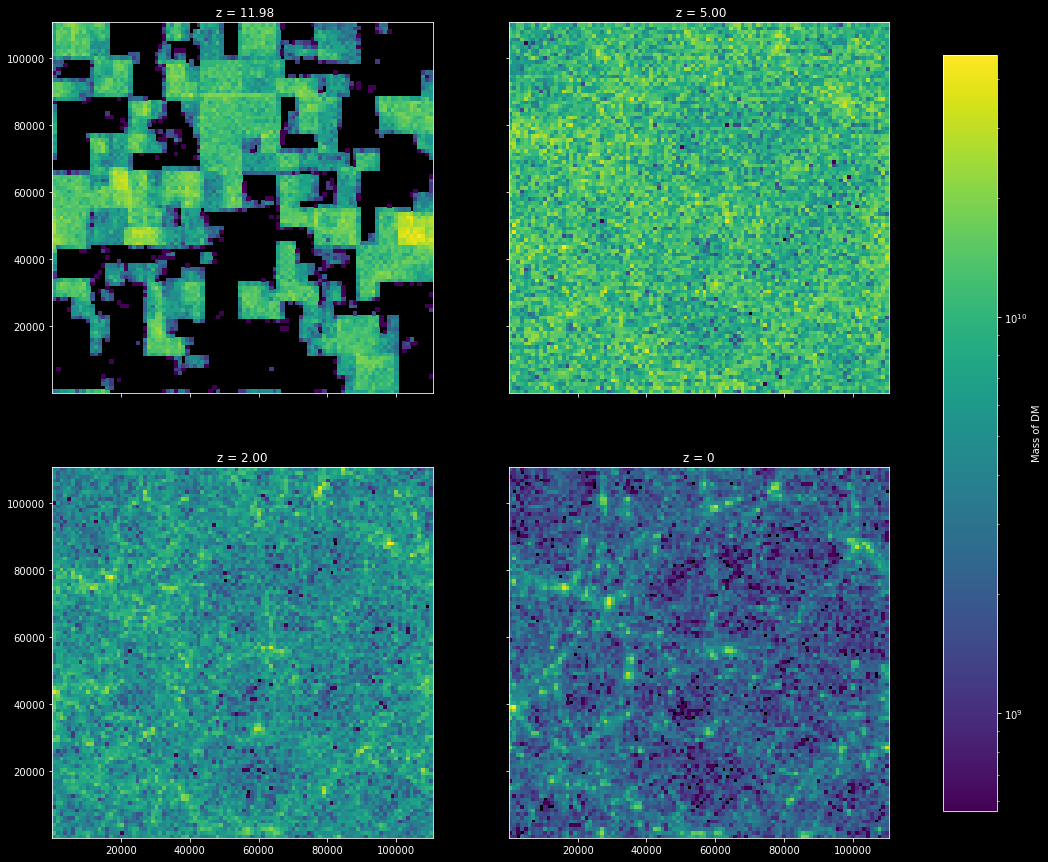

In [5]:
plt.style.use('dark_background')
fig, axs = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True, figsize=(15, 15))#, facecolor='black')
h2 = axs[0, 0].hist2d(dmdf2["DMPosX"][::1000], dmdf2["DMPosY"][::1000], bins = 100, weights = mass_dm*np.ones(len(dmdf2["DMPosY"][::1000])), norm = clr.LogNorm())
h17 = axs[0, 1].hist2d(dmdf17["DMPosX"][::1000], dmdf17["DMPosY"][::1000], bins = 100, weights = mass_dm*np.ones(len(dmdf17["DMPosY"][::1000])), norm = clr.LogNorm())
h33 = axs[1, 0].hist2d(dmdf33["DMPosX"][::1000], dmdf33["DMPosY"][::1000], bins = 100, weights = mass_dm*np.ones(len(dmdf33["DMPosY"][::1000])), norm = clr.LogNorm())
h99 = axs[1, 1].hist2d(dmdf99["DMPosX"][::1000], dmdf99["DMPosY"][::1000], bins = 100, weights = mass_dm*np.ones(len(dmdf99["DMPosY"][::1000])), norm = clr.LogNorm())
axs[0, 0].set_title(' z = 11.98')
axs[0, 1].set_title(' z = 5.00')
axs[1, 0].set_title('z = 2.00')
axs[1, 1].set_title('z = 0')
cbar_ax = fig.add_axes([0.95, 0.15, 0.05, 0.7])
cbar = fig.colorbar(h2[3], cax=cbar_ax)
cbar.set_label('Mass of DM')
plt.show()

In [6]:
mass_per_pixel = np.median(h2[0])*1000
pixel_area = (lbox/100/1e3)**2
dens = mass_per_pixel/pixel_area
print("Typical matter column densities")
print("z = 11.98 : %.2E M_sun/Mpc^2"%dens)
mass_per_pixel = np.median(h17[0])*1000
dens = mass_per_pixel/pixel_area
print("z = 5.00 : %.2E M_sun/Mpc^2"%dens)
mass_per_pixel = np.median(h33[0])*1000
dens = mass_per_pixel/pixel_area
print("z = 2.00 : %.2E M_sun/Mpc^2"%dens)
mass_per_pixel = np.median(h99[0])*1000
dens = mass_per_pixel/pixel_area
print("z = 0 : %.2E M_sun/Mpc^2"%dens)

print(" ")

dens3Dmin = min(dmdf2["Dens"][::1000])/(1e3)**3
dens3Dmax = max(dmdf2["Dens"][::1000])/(1e3)**3
print("3D matter densities ranges : ")
print("z = 11.98 : %.2E and %.2E M_sun/Mpc^3"%(dens3Dmin, dens3Dmax))
dens3Dmin = min(dmdf17["Dens"][::1000])/(1e3)**3
dens3Dmax = max(dmdf17["Dens"][::1000])/(1e3)**3
print("z = 5 : %.2E and %.2E M_sun/Mpc^3"%(dens3Dmin, dens3Dmax))
dens3Dmin = min(dmdf33["Dens"][::1000])/(1e3)**3
dens3Dmax = max(dmdf33["Dens"][::1000])/(1e3)**3
print("z = 2 : %.2E and %.2E M_sun/Mpc^3"%(dens3Dmin, dens3Dmax))
dens3Dmin = min(dmdf99["Dens"][::1000])/(1e3)**3
dens3Dmax = max(dmdf99["Dens"][::1000])/(1e3)**3
print("z = 0 : %.2E and %.2E M_sun/Mpc^3"%(dens3Dmin, dens3Dmax))

print(" ")

dens3Davg = np.mean(dmdf2["Dens"][::1000])/(1e3)**3
print("Average 3D matter densities")
print("z = 11.98 : %.2E M_sun/Mpc^3"%(dens3Davg))
dens3Davg = np.mean(dmdf17["Dens"][::1000])/(1e3)**3
print("z = 5 : %.2E M_sun/Mpc^3"%(dens3Davg))
dens3Davg = np.mean(dmdf33["Dens"][::1000])/(1e3)**3
print("z = 2 : %.2E M_sun/Mpc^3"%(dens3Davg))
dens3Davg = np.mean(dmdf99["Dens"][::1000])/(1e3)**3
print("z = 0 : %.2E M_sun/Mpc^3"%(dens3Davg))

Typical matter column densities
z = 11.98 : 1.85E+12 M_sun/Mpc^2
z = 5.00 : 4.16E+12 M_sun/Mpc^2
z = 2.00 : 4.16E+12 M_sun/Mpc^2
z = 0 : 2.77E+12 M_sun/Mpc^2
 
3D matter densities ranges : 
z = 11.98 : 1.04E-08 and 5.74E-05 M_sun/Mpc^3
z = 5 : 6.31E-09 and 1.40E-03 M_sun/Mpc^3
z = 2 : 2.52E-09 and 7.67E-03 M_sun/Mpc^3
z = 0 : 7.69E-10 and 7.60E-02 M_sun/Mpc^3
 
Average 3D matter densities
z = 11.98 : 4.90E-08 M_sun/Mpc^3
z = 5 : 9.70E-07 M_sun/Mpc^3
z = 2 : 1.40E-05 M_sun/Mpc^3
z = 0 : 2.78E-04 M_sun/Mpc^3


The 3d matter density probably does not correspond to the SubfindDensity given by the datasets... 

### Calculate the density contrast field

We measure the 3d matter density by dividing the whole simulation box into smaller boxes with desired length, then we count the number of particles inside each small box. That number times the mass of a dark matter particle, divided by the volume of a small box, gives us then the density. 

In [7]:
def dens3d(lens, dataset = 99):
    box = np.linspace(0, lbox, int(lbox/lens))
    bins = len(box)
    downsampling = 1000
    df = dmdf99 
    if dataset == 2:
        df = dmdf2
    elif dataset == 17:
        df = dmdf17
    elif dataset == 33:
        df = dmdf33
    x_bins = np.digitize(df["DMPosX"][::downsampling], box)
    y_bins = np.digitize(df["DMPosY"][::downsampling], box)
    z_bins = np.digitize(df["DMPosZ"][::downsampling], box)
    vol = [[[0 for x in range(bins)] for y in range(bins)]for z in range(bins)]
    for i in range(0, len(x_bins)):
        x = x_bins[i] - 1
        y = y_bins[i] - 1
        z = z_bins[i] - 1
        vol[x][y][z] += 1
    vol_flat = [item for items in vol for item in items]
    vol_flatten = np.asarray([item for items in vol_flat for item in items])
    rho = vol_flatten*downsampling*mass_dm/(lens/1e3)**3               # M_sun/Mpc^3
    rho_avg = np.mean(rho)
    delta = rho/rho_avg - 1
    h = plt.hist(delta, bins = 1000)
    plt.clf()
    return (h[1][1:] + h[1][:-1])/2, h[0]/np.sum(h[0])

In [16]:
h_1e2kpc = dens3d(1e2)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Probability distribution of the density contrast')

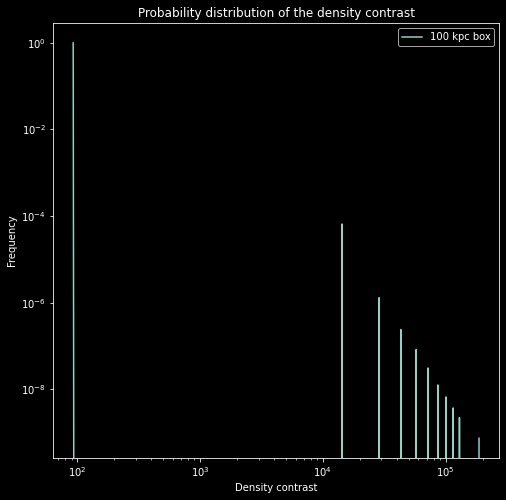

In [17]:
plt.figure(figsize = (8, 8))
plt.loglog(h_1e2kpc[0], h_1e2kpc[1], label = "100 kpc box")
plt.legend()
plt.xlabel("Density contrast")
plt.ylabel("Frequency")
plt.title("Probability distribution of the density contrast")

In [14]:
h_Mpc = dens3d(1e3)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Probability distribution of the density contrast')

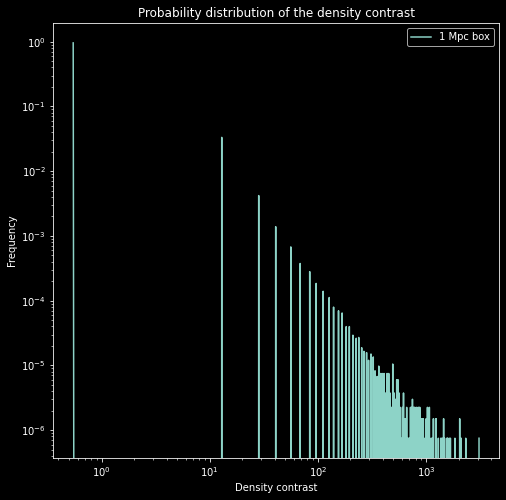

In [15]:
plt.figure(figsize = (8, 8))

plt.loglog(h_Mpc[0], h_Mpc[1], label = "1 Mpc box")
#plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel("Density contrast")
plt.ylabel("Frequency")
plt.title("Probability distribution of the density contrast")

In [12]:
h_10Mpc = dens3d(1e4)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Probability distribution of the density contrast')

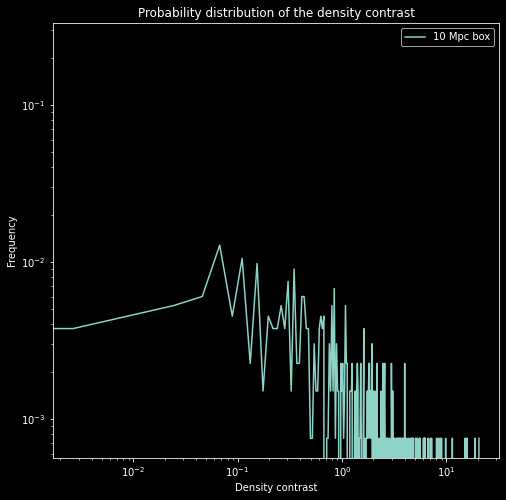

In [13]:
plt.figure(figsize = (8, 8))
plt.loglog(h_10Mpc[0], h_10Mpc[1], label = "10 Mpc box")
#plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel("Density contrast")
plt.ylabel("Frequency")
plt.title("Probability distribution of the density contrast")

From the plot we see that at z = 0, the density contrast can reach a quite high value, in the order of 1e3 in the case of 1Mpc box, or in the order of 1e5 in the case of 100 kpc box. That is due to the nonlinear growth of perturbation after density contrast reaching 1 at certain redshift. Nevertheless, the high density contrast region has much smaller proportion compared to low density contrast region, i.e. 10^8 order of magnitude less. 

However, the behaviour of density measured in 10 Mpc box is completely different. The density contrast is always less than 100. That is because in 10 Mpc box the inhomogeneity of the Universe is less to be seen, as it largely exceeds, for example, the scale of a typical galaxy cluter and thus one small box contains large portion of "voids" where matter density is low. 

### Now repeat the measurement for other redshifts and compare them.

In [18]:
h2_1e2kpc = dens3d(1e2, 2)
h17_1e2kpc = dens3d(1e2, 17)
h33_1e2kpc = dens3d(1e2, 33)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Probability distribution of the density contrast calculated in 100 kpc box')

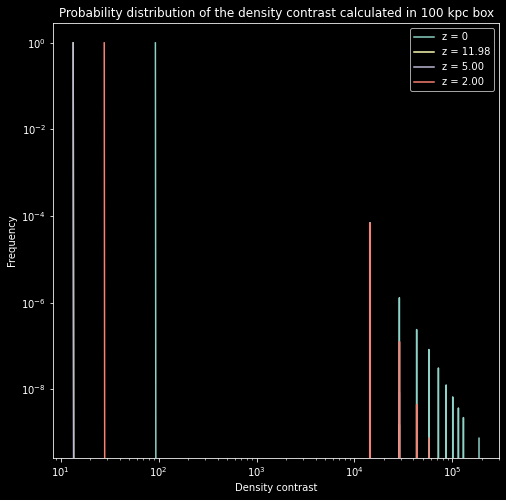

In [19]:
plt.figure(figsize = (8, 8))
plt.plot(h_1e2kpc[0], h_1e2kpc[1], label = "z = 0")
plt.plot(h2_1e2kpc[0], h2_1e2kpc[1], label = "z = 11.98")
plt.plot(h2_1e2kpc[0], h17_1e2kpc[1], label = "z = 5.00")
plt.loglog(h33_1e2kpc[0], h33_1e2kpc[1], label = "z = 2.00")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.xlabel("Density contrast")
plt.ylabel("Frequency")
plt.title("Probability distribution of the density contrast calculated in 100 kpc box")

In [20]:
h2_Mpc = dens3d(1e3, 2)
h17_Mpc = dens3d(1e3, 17)
h33_Mpc = dens3d(1e3, 33)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Probability distribution of the density contrast calculated in 1 Mpc box')

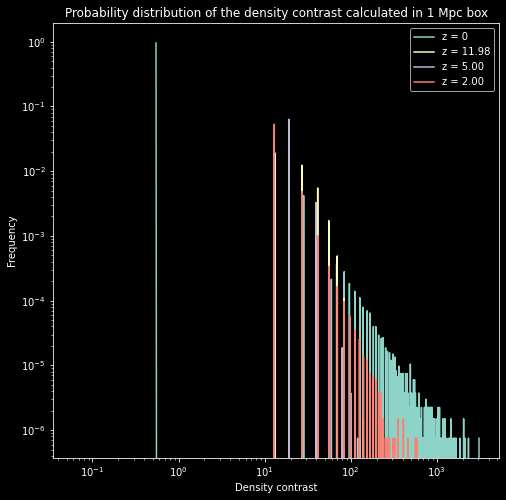

In [30]:
plt.figure(figsize = (8, 8))
plt.loglog(h_Mpc[0], h_Mpc[1], label = "z = 0")
plt.loglog(h2_Mpc[0], h2_Mpc[1], label = "z = 11.98")
plt.loglog(h2_Mpc[0], h17_Mpc[1], label = "z = 5.00")
plt.loglog(h33_Mpc[0], h33_Mpc[1], label = "z = 2.00")
plt.legend()
plt.xlabel("Density contrast")
plt.ylabel("Frequency")
plt.title("Probability distribution of the density contrast calculated in 1 Mpc box")

In [23]:
h2_10Mpc = dens3d(1e4, 2)
h17_10Mpc = dens3d(1e4, 17)
h33_10Mpc = dens3d(1e4, 33)

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Probability distribution of the density contrast calculated in 10 Mpc box')

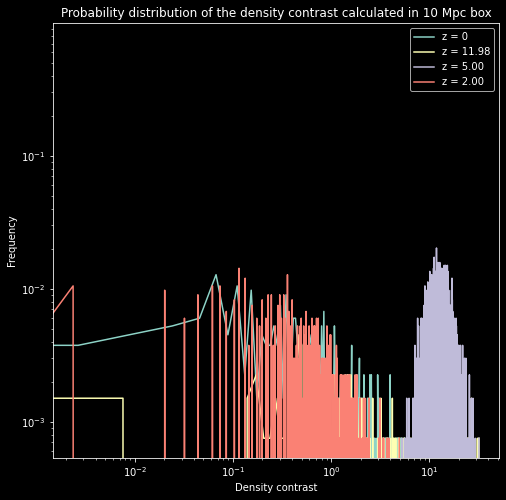

In [31]:
plt.figure(figsize = (8, 8))
plt.loglog(h_10Mpc[0], h_10Mpc[1], label = "z = 0")
plt.loglog(h2_10Mpc[0], h2_10Mpc[1], label = "z = 11.98")
plt.loglog(h2_10Mpc[0], h17_10Mpc[1], label = "z = 5.00")
plt.loglog(h33_10Mpc[0], h33_10Mpc[1], label = "z = 2.00")
plt.legend()
plt.xlabel("Density contrast")
plt.ylabel("Frequency")
plt.title("Probability distribution of the density contrast calculated in 10 Mpc box")

From the above plots we see that the high density contrast builds up at late time (small z), as expected because of gravitational instability.

## 2. Gravitational collapse and the formation of haloes

Clusters of galaxies M ~ 10^15 M_sun, R ~ 2-3 Mpc. Assuming spherical distribution.

Assuming an average density of 1e10 M_sun/Mpc^3.

Text(0.5, 1.0, 'Probability distribution of the density contrast calculated in 100 kpc box')

<Figure size 432x288 with 0 Axes>

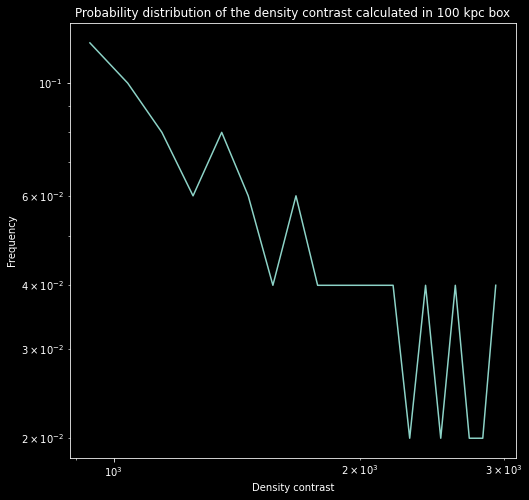

In [33]:
r = np.linspace(2, 3, 50)
rho_cluster = 1e15/(4/3 *np.pi *r**3)
rho_avg = 1e10
overDens = rho_cluster/rho_avg - 1
h = plt.hist(overDens, bins = 20)
plt.clf()
plt.figure(figsize = (8,8))
plt.loglog((h[1][1:] + h[1][:-1])/2, h[0]/np.sum(h[0]))
plt.xlabel("Density contrast")
plt.ylabel("Frequency")
plt.title("Probability distribution of the density contrast calculated in 100 kpc box")

In [35]:
rho_typ = (h[1][0] + h[1][1])/2
print("The typical over density is then %.2f, with a probability of %.2f"%(rho_typ, h[0][0]/sum(h[0])))

The typical over density is then 935.69, with a probability of 0.12


Compare this plot with the plots from Exercise 1 where the 3d matter density is calculated in box